In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# statsmodels and do a pure NumPy version of your GWAS pipeline. It’ll:

# Generate synthetic SNP data and phenotype

# Compute simple linear regression for each SNP (beta & p-value)

# Create a Manhattan plot

# Identify significant SNPs

In [ ]:

# --- Step 1: Simulate Genomic & Phenotype Data ---
np.random.seed(42)
n_plants, n_snps = 300, 5000
G = pd.DataFrame(np.random.randint(0,3,(n_plants,n_snps)), 
                 columns=[f"SNP_{i+1}" for i in range(n_snps)])
base_yield = np.random.normal(100, 10, n_plants)


# What type of genomic data is used in crop analysis?

# A: SNP (Single Nucleotide Polymorphism) data, gene expression data (RNA-seq), and whole genome sequencing data are commonly used.




# Which crops have benefited from genomic studies?

# A:

# Rice → Drought and salt tolerance.

# Maize → High yield hybrids.

# Wheat → Rust disease resistance.

# Soybean → Enhanced protein content.

In [29]:
# Causal SNPs effects
causal = [150, 1800, 3500]
phenotype = base_yield + G.iloc[:,causal[0]]*3.5 + G.iloc[:,causal[1]]*5 + G.iloc[:,causal[2]]*4
y = pd.Series(phenotype, name="Yield")
print(f"Causal SNPs: {[G.columns[i] for i in causal]}")

Causal SNPs: ['SNP_151', 'SNP_1801', 'SNP_3501']


In [30]:
# --- Step 2: GWAS using pure numpy/scipy ---
p_values = []
for snp in G.columns:
    slope, intercept, r_value, p_val, std_err = stats.linregress(G[snp], y)
    p_values.append(p_val)

gwas = pd.DataFrame({'SNP': G.columns, 'p': p_values})
gwas['-log10(p)'] = -np.log10(gwas['p'])
gwas['Pos'] = range(len(gwas))

In [31]:
# Bonferroni threshold  :Bonferroni-corrected significance threshold is basically a safety check when you’re doing lots of statistical tests at onc
threshold = -np.log10(0.05 / n_snps)


# When you do one test (say, comparing two groups), you usually set a significance level, called α, often 0.05. That means there’s a 5% chance of saying “this result is real” when it’s actually just random noise (a false positive).

# But in genetics, like GWAS (genome-wide association studies), you’re testing hundreds of thousands or millions of SNPs (genetic variants) at the same time.

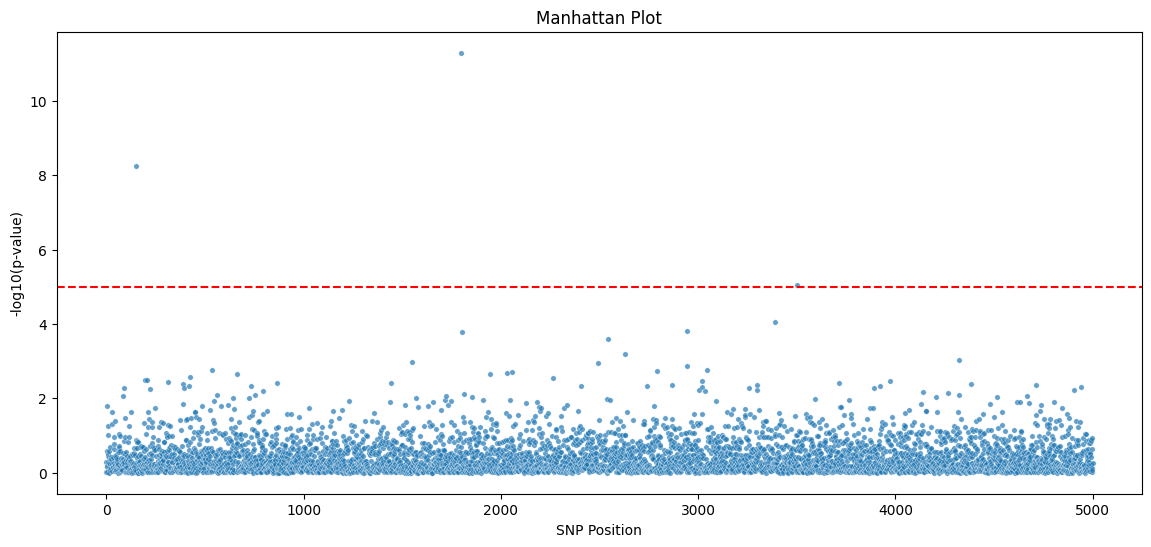

In [32]:
# --- Step 3: Manhattan Plot ---
plt.figure(figsize=(14,6))
sns.scatterplot(x='Pos', y='-log10(p)', data=gwas, s=15, alpha=0.7)
plt.axhline(threshold, color='r', linestyle='--')
plt.title("Manhattan Plot")
plt.xlabel("SNP Position")
plt.ylabel("-log10(p-value)")
plt.show()




# 1️⃣ Axes

# X-axis (SNP Position)

# Each dot represents one SNP.

# Position is just the SNP index (1 to 5000 in your simulation).

# Y-axis (-log10(p-value))

# This shows significance of association between SNP and yield.

# Higher points = more significant SNPs.

# For example: -log10(p) = 5 means p-value = 10⁻⁵ → very strong association.

# 2️⃣ Red dashed line

# This is your Bonferroni-corrected significance threshold.

# Any SNP above this line is considered statistically significant.

# In your plot, a few dots cross this line → these are your significant SNPs, likely the causal ones you simulated.

# 3️⃣ Blue dots

# These are all SNPs tested in the GWAS.

# Most dots are below the threshold → these SNPs have no real effect on yield.

# 4️⃣ Peaks

# The peaks above the red line are the “signal SNPs”.

# In your simulation, the 3 causal SNPs (SNP_151, SNP_1801, SNP_3501) should correspond to these peaks.

# These peaks are what breeders or geneticists look for as markers to select plants with good traits.

# 5️⃣ Conceptually

# Think of this like a skyline of a city:

# Tall skyscrapers = SNPs that matter (causal).

# Short buildings = background noise, SNPs that don’t affect the trait.

# This plot is called a Manhattan plot because the tall peaks look like the Manhattan skyline.




In [33]:
# Concept: Agricultural Genomics & Crop Improvement

# What it is:
# Agricultural genomics studies the DNA (genome) of crops to understand how genetic variation affects traits.

# Why it matters:

# Traditional breeding takes years: you plant, wait, observe traits, select the best.

# Genomic information lets us predict desirable traits from DNA alone, speeding up breeding.

# Key terms:

# SNPs (Single Nucleotide Polymorphisms):
# Small DNA changes at one base pair. Some affect traits like yield or disease resistance.

# Phenotype:
# Observable trait, e.g., crop yield, disease resistance, drought tolerance.

# Genetic markers:
# Specific SNPs strongly associated with traits. These are targets for breeding.

# How it works:

# Step 1: Collect crop DNA (genotypes) and measure traits (phenotypes).

# Step 2: Perform GWAS (Genome-Wide Association Study): test each SNP to see if it correlates with the trait.

# Step 3: Identify significant SNPs → these become genetic markers.

# Step 4: Use markers in breeding: select plants with the “good” alleles without waiting for full growth.

# ✅ The goal is to find SNPs linked to desirable traits so we can improve crops efficiently.

In [34]:

# --- Step 4: Significant SNPs ---
sig = gwas[gwas['-log10(p)'] > threshold]
print(f"Bonferroni threshold: {threshold:.2f}")
if not sig.empty:
    print("Significant SNPs found:")
    display(sig[['SNP','p','-log10(p)']].head())
else:
    print("No significant SNPs found.")

Bonferroni threshold: 5.00
Significant SNPs found:


,SNP,p,-log10(p)
150,SNP_151,5.515090e-09,8.258447
1800,SNP_1801,5.118013e-12,11.290899
3500,SNP_3501,8.945941e-06,5.048374
